In [2]:
import pandas as pd

In [3]:
from nsepy import get_history as gh
import datetime as dt

In [4]:
import yfinance as yf

In [5]:
import datetime as dt

start = dt.datetime(2021, 7, 1)
end = dt.datetime(2022, 1, 27)
symbol = 'AXISBANK.NS'  # Stock symbol in uppercase

stk_data = yf.download(symbol, start=start, end=end)

[*********************100%%**********************]  1 of 1 completed


start = dt.datetime(2013,6,1)
end = dt.datetime(2022,2,11)
stk_data = gh(symbol='TATACOFFEE',start=start,end=end)


In [6]:
stk_data=stk_data[["Open","High","Low","Close"]]
#stk_data.to_csv("Tatacoffee13_21.csv")

In [7]:
stk_data

,Open,High,Low,Close
Date,,,,
2021-07-01,750.000000,754.400024,744.500000,746.450012
2021-07-02,747.599976,752.849976,744.000000,750.650024
2021-07-05,757.099976,762.000000,753.400024,760.349976
2021-07-06,757.000000,767.000000,755.200012,758.349976
2021-07-07,755.900024,764.000000,752.250000,762.900024
...,...,...,...,...
2022-01-19,725.200012,731.950012,718.700012,729.599976
2022-01-20,731.049988,737.150024,722.150024,728.900024
2022-01-21,722.000000,725.250000,708.049988,712.500000


In [8]:
column="Close"

In [9]:
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
data1= Ms.fit_transform(stk_data[[column]])
print("Len:",data1.shape)

Len: (143, 1)


In [10]:
training_size = round(len(data1 ) * 0.80)
print(training_size)
X_train=data1[:training_size]
X_test=data1[training_size:]
print("X_train length:",X_train.shape)
print("X_test length:",X_test.shape)
y_train=data1[:training_size]
y_test=data1[training_size:]
print("y_train length:",y_train.shape)
print("y_test length:",y_test.shape)

114
X_train length: (114, 1)
X_test length: (29, 1)
y_train length: (114, 1)
y_test length: (29, 1)


In [13]:
import numpy as np
from sklearn.metrics import mean_squared_error

def rmsemape(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return rmse, mape

orders = [(0, 0, 0), (0, 0, 1), (2, 0, 1), (1, 1, 1)]

for i in orders:
    from statsmodels.tsa.statespace.sarimax import SARIMAX
    model = SARIMAX(data1, order=i, seasonal_order=(0, 0, 0, 12), exog=None)  
    model_fit = model.fit()
    y_pred = model_fit.predict(0, len(data1) - 1)
    rmse, mape = rmsemape(data1, y_pred)
    print(f"Order={i}, RMSE={rmse:.2f}, MAPE={mape:.2f}%")

Order=(0, 0, 0), RMSE=0.53, MAPE=nan%
Order=(0, 0, 1), RMSE=0.29, MAPE=nan%
Order=(2, 0, 1), RMSE=0.07, MAPE=nan%
Order=(1, 1, 1), RMSE=0.07, MAPE=nan%


C:\Users\midhu\AppData\Local\Temp\ipykernel_12460\754311004.py:7: RuntimeWarning: invalid value encountered in divide
  mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
C:\Users\midhu\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\midhu\AppData\Local\Temp\ipykernel_12460\754311004.py:7: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
C:\Users\midhu\AppData\Local\Temp\ipykernel_12460\754311004.py:7: RuntimeWarning: invalid value encountered in divide
  mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
C:\Users\midhu\AppData\Local\Temp\ipykernel_12460\754311004.py:7: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
C:\Users\midhu\AppData\Local\Temp\ipykernel_12460\754311

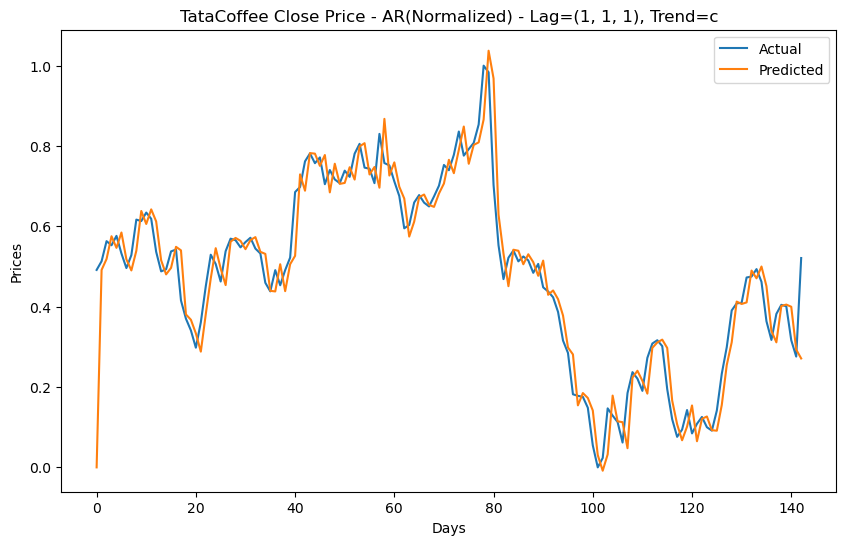

In [14]:
import matplotlib.pyplot as plt
td = "c"
plt.figure(figsize=(10, 6))
plt.plot(data1, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Days')
plt.ylabel('Prices')
plt.title('TataCoffee Close Price - AR(Normalized) - Lag={}, Trend={}'.format(i, td))
plt.legend()
plt.show()

In [15]:
len(data1)

143

In [16]:
actual_stock_price_test_ori = np.array([[100], [110], [105], [95]])  
actual_stock_price_test_ori_flat = actual_stock_price_test_ori.flatten()
actual_stock_price_test_oriA = pd.DataFrame({'Close': actual_stock_price_test_ori_flat})

In [17]:
predicted_stock_price_test_oriP = pd.DataFrame({'Close': y_pred})
if not predicted_stock_price_test_oriP.empty:
    predicted_stock_price_test_oriP[['Close']] = Ms.inverse_transform(predicted_stock_price_test_oriP[['Close']])

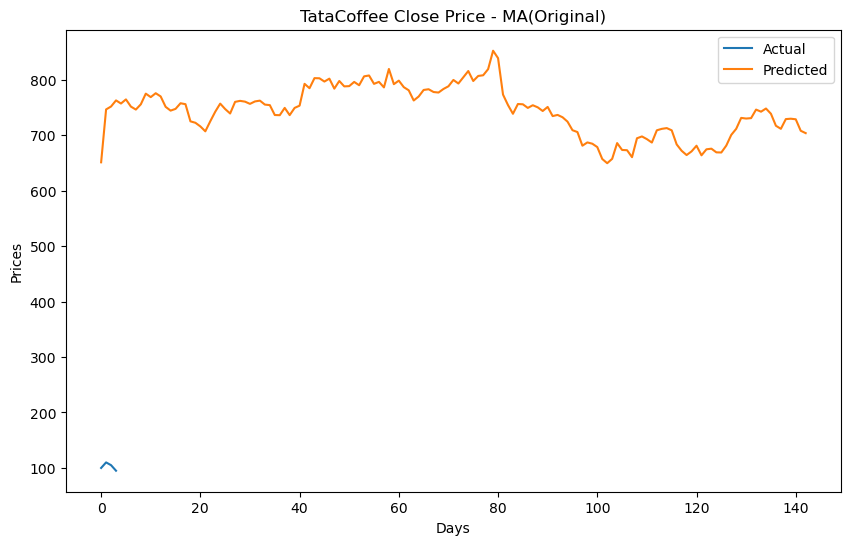

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(actual_stock_price_test_oriA['Close'], label='Actual')
plt.plot(predicted_stock_price_test_oriP['Close'], label='Predicted')
plt.xlabel('Days')
plt.ylabel('Prices')
plt.title('TataCoffee Close Price - MA(Original)')
plt.legend()
plt.show()

In [19]:
def rmsemape(y_true, y_pred):
    mse = np.mean((y_true - y_pred) ** 2)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return rmse, mape

rmse, mape = rmsemape(actual_stock_price_test_oriA, predicted_stock_price_test_oriP)

In [20]:
forecast=model_fit.predict(len(data1), len(data1)+1)

In [21]:
forecast

array([0.59077296, 0.59003199])

In [22]:
fTestNormTable = pd.DataFrame({'Closefore': forecast})
Ms.fit(fTestNormTable[['Closefore']].values.reshape(-1, 1))  
forecast_stock_price_test_ori = Ms.inverse_transform(fTestNormTable[['Closefore']])
forecast_stock_price_test_oriF = pd.DataFrame({'Closefore': forecast_stock_price_test_ori[:, 0]})

In [23]:
forecast_stock_price_test_oriF.to_csv("Closets.csv",index=False)

In [24]:
forecast_stock_price_test_oriF

,Closefore
0,0.590470
1,0.590469


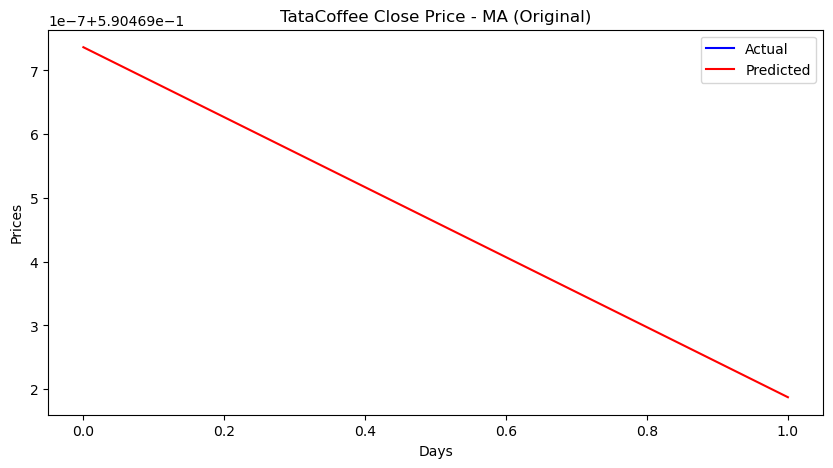

In [25]:
plt.figure(figsize=(10, 5))
plt.plot(actual_stock_price_test_oriA[2000:2225], color='blue', label="Actual")
plt.plot(forecast_stock_price_test_oriF, color='red', label="Predicted")
plt.xlabel('Days')
plt.ylabel('Prices')
plt.title('TataCoffee Close Price - MA (Original)')
plt.legend()
plt.show()
